# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [120]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [121]:
# 데이터셋 종류 : 
data = load_wine()

In [122]:
input = data.data
output = data.target

In [123]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [125]:
y_test

tensor([0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2,
        1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,
        2, 0, 1, 1, 2, 0])

In [126]:
print(x_train[0])
print(y_train[0])

#input 13개 (속성이 13개)
#y의 class는 3개

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [127]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [128]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

시도1. 기본 accuracy 0.94

In [167]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,100, bias=True), 
          nn.ReLU(),
          nn.Linear(100,50, bias=True),
          nn.ReLU(),
          nn.Linear(50,10, bias=True), 
          nn.ReLU()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [168]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,100, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.ReLU(),
          nn.BatchNorm1d(100)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
        nn.Linear(100,50, bias=True), 
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(50,30, bias=True), 
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30,10, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [169]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [170]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-169-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=100, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [171]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=100, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


In [172]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [173]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.330634832382202
10 1.776344895362854
20 1.773117184638977
30 1.7590594291687012
40 1.6407513618469238
50 1.520797848701477
60 1.5044705867767334
70 1.501348853111267
80 1.487017273902893
90 1.4769426584243774


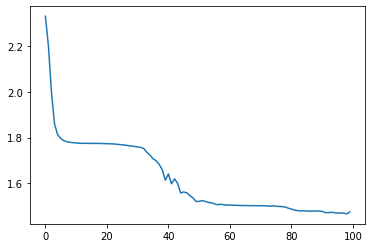

In [174]:
plt.plot(losses)
plt.show()

In [175]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [176]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9999964e-01 4.0861889e-07 3.7456938e-13 5.3788350e-15 6.3601653e-17
 4.7630662e-19 1.1134284e-16 6.3459615e-25 2.6911413e-18 1.4716496e-20]
argmax를 한 후의 output은 0
accuracy는 0.9444444444444444


시도2. optimizer 변경 accuracy 0.7

In [149]:
model = nn.Sequential(
          nn.Linear(13,100, bias=True), 
          nn.ReLU(),
          nn.Linear(100,50, bias=True),
          nn.ReLU(),
          nn.Linear(50,10, bias=True), 
          nn.ReLU()
          ).to(device)

In [150]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,100, bias=True),  
          nn.ReLU(),
          nn.BatchNorm1d(100)
    )
    self.layer2 = nn.Sequential(
        nn.Linear(100,50, bias=True), 
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(50,30, bias=True), 
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(30,10, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [151]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [152]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-151-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=100, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=100, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [153]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [154]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 2.2993271350860596
10 1.9644886255264282
20 1.7780237197875977
30 1.7749029397964478
40 1.774895191192627
50 1.7747796773910522
60 1.7744216918945312
70 1.7740567922592163
80 1.7735406160354614
90 1.7728630304336548


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


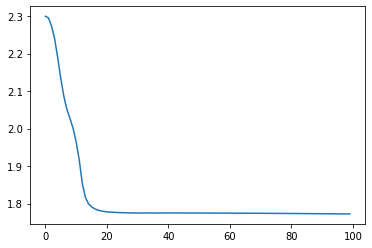

In [155]:
plt.plot(losses)
plt.show()

In [156]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [157]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.0000000e+00 2.2196614e-17 1.3128269e-22 6.8329756e-23 7.3602956e-25
 1.7970178e-22 8.2333747e-23 5.4415989e-22 1.5824631e-26 3.4847828e-22]
argmax를 한 후의 output은 0
accuracy는 0.7037037037037037


시도3. hidden layer/neuron 수 변경 accuracy 0.7

In [158]:
model = nn.Sequential(
          nn.Linear(13,300, bias=True), 
          nn.ReLU(),
          nn.Linear(300,200, bias=True),
          nn.ReLU(),
          nn.Linear(200,100, bias=True), 
          nn.ReLU(),
          nn.Linear(100,30, bias=True), 
          nn.ReLU()
          
          ).to(device)

In [159]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,300, bias=True), 
          nn.ReLU(),
          nn.BatchNorm1d(300)
    )
    self.layer2 = nn.Sequential(
        nn.Linear(300,200, bias=True), 
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
        nn.Linear(200,100, bias=True), 
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(100,30, bias=True), 
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [160]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [161]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-160-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=300, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=100, out_features=30, bias=True)
    (1): Softmax(dim=None)
  )
)

In [162]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [163]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 3.3955204486846924
10 2.771425485610962
20 2.7712111473083496
30 2.771358013153076
40 2.7712039947509766
50 2.77112078666687
60 2.7556064128875732
70 2.7559244632720947
80 2.75531268119812
90 2.75528621673584


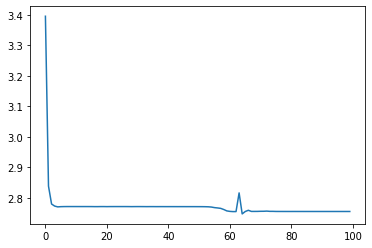

In [164]:
plt.plot(losses)
plt.show()

In [165]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [166]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
argmax를 한 후의 output은 0
accuracy는 0.7037037037037037


# < 3주차 과제 2 : CNN 맛보기>

In [177]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [178]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [179]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) 

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [180]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [181]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [182]:
def test():
    model.eval() #model.eval() 의 기능은? evaluation 과정에서 다르게 동작하는 모델의 일부 layer들에 대한 스위치 역할
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [183]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-179-8ac542bfdccc>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295727
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.279011
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.273411
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.264892
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.244670
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.205475
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.195847
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.105964
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.039676
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.913900
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.670745
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.492746
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.142487
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.079685
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.712931
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.789612
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.653268
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.662598
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.667593
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.469316
Train Epoch: 1 [12800/60000 (

<ipython-input-182-fb792a7bd91e>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1813, Accuracy: 9485/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.390010
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.091692
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.129786
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.125482
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.081993
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.131949
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.063838
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.148336
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.103000
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.208631
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.191334
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.244584
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.364263
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.142325
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.164085
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.052648
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.258235
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.158231
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.082150
Train Epoch: 2 [12